In [21]:
## Basic Exploratory analysis

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("calc_case_description_train_set.csv")

# 1. Shape of the dataset (Number of rows and columns)
print("Dataset Shape:", df.shape)

# 2. Display column names
print("\nColumn Names:", df.columns.tolist())

# 3. Display data types of each column
print("\nData Types:")
print(df.dtypes)

# 4. Display first few rows of the dataset
print("\nFirst 5 Rows:")
print(df.head())

# 5. Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# 6. Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Shape: (1546, 14)

Column Names: ['patient_id', 'breast density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'calc type', 'calc distribution', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']

Data Types:
patient_id                 object
breast density              int64
left or right breast       object
image view                 object
abnormality id              int64
abnormality type           object
calc type                  object
calc distribution          object
assessment                  int64
pathology                  object
subtlety                    int64
image file path            object
cropped image file path    object
ROI mask file path         object
dtype: object

First 5 Rows:
  patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3   

In [22]:
#Display count of each datatype present in a column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].apply(lambda x: type(x)).value_counts(), "\n")

Column: patient_id
patient_id
<class 'str'>    1546
Name: count, dtype: int64 

Column: breast density
breast density
<class 'int'>    1546
Name: count, dtype: int64 

Column: left or right breast
left or right breast
<class 'str'>    1546
Name: count, dtype: int64 

Column: image view
image view
<class 'str'>    1546
Name: count, dtype: int64 

Column: abnormality id
abnormality id
<class 'int'>    1546
Name: count, dtype: int64 

Column: abnormality type
abnormality type
<class 'str'>    1546
Name: count, dtype: int64 

Column: calc type
calc type
<class 'str'>      1526
<class 'float'>      20
Name: count, dtype: int64 

Column: calc distribution
calc distribution
<class 'str'>      1170
<class 'float'>     376
Name: count, dtype: int64 

Column: assessment
assessment
<class 'int'>    1546
Name: count, dtype: int64 

Column: pathology
pathology
<class 'str'>    1546
Name: count, dtype: int64 

Column: subtlety
subtlety
<class 'int'>    1546
Name: count, dtype: int64 

Column: image 

In [23]:
# Detect and Print numeric, categorical and mixed type columns

# Detect purely numeric columns
pure_numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Detect purely categorical columns
pure_categorical_cols = [col for col in df.select_dtypes(include=["object"]).columns 
                         if df[col].map(type).nunique() == 1]

# Detect mixed type columns
mixed_type_cols = [
    col for col in df.columns
    if df[col].dropna().map(type).nunique() > 1
]

# Print detected column types
print("Purely Numeric Columns:", pure_numeric_cols)
print("Purely Categorical Columns:", pure_categorical_cols)
print(f"Mixed Data Type Columns: {mixed_type_cols}")

Purely Numeric Columns: ['breast density', 'abnormality id', 'assessment', 'subtlety']
Purely Categorical Columns: ['patient_id', 'left or right breast', 'image view', 'abnormality type', 'pathology', 'image file path', 'cropped image file path', 'ROI mask file path']
Mixed Data Type Columns: []


In [24]:
# Identify columns where numbers are stored as strings
numeric_string_cols = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, str) and x.isdigit()).any()]
print("Columns with numeric values stored as strings:", numeric_string_cols)

Columns with numeric values stored as strings: []


In [25]:
# Display misising values in columns in the dataset
print("Missing Values:\n")
print(df.isnull().sum().sort_values(ascending=False))

Missing Values:

calc distribution          376
calc type                   20
patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64


In [26]:
# Replace missing values in categorical Column "calc type" and replace with most frequent value

mode_value = df["calc type"].mode()[0]  # Get the most common value
df["calc type"] = df["calc type"].fillna(mode_value)

# Print mode value and updated column
print(f"The most frequent value used for replacement: {mode_value}")
print("\nUpdated 'calc type' column:")
print(df["calc type"])

The most frequent value used for replacement: PLEOMORPHIC

Updated 'calc type' column:
0                   AMORPHOUS
1                   AMORPHOUS
2                 PLEOMORPHIC
3                 PLEOMORPHIC
4                 PLEOMORPHIC
                ...          
1541    AMORPHOUS-PLEOMORPHIC
1542                AMORPHOUS
1543                AMORPHOUS
1544              PLEOMORPHIC
1545              PLEOMORPHIC
Name: calc type, Length: 1546, dtype: object


In [27]:
#Replace missing values in categorical column "calc distribution" and replace with most frequent value
mode_value = df["calc distribution"].mode()[0]  # Get the most common value
df["calc distribution"] = df["calc distribution"].fillna(mode_value)

# Print mode value and updated column
print(f"The most frequent value used for replacement: {mode_value}")
print("\nUpdated 'calc distribution' column:")
print(df["calc distribution"])

The most frequent value used for replacement: CLUSTERED

Updated 'calc distribution' column:
0       CLUSTERED
1       CLUSTERED
2          LINEAR
3          LINEAR
4        REGIONAL
          ...    
1541    SEGMENTAL
1542    CLUSTERED
1543    CLUSTERED
1544    SEGMENTAL
1545    SEGMENTAL
Name: calc distribution, Length: 1546, dtype: object


In [28]:
#Convert "cal type' column to string. It contains both string and float type
df['mass shape'] = df['calc type'].astype(str)
print(df['mass shape'].apply(type).unique())  # Check unique data types

[<class 'str'>]


In [29]:
#Check for other columns that may contain mixed datatypes

# Step 1: Identify columns that were initially mixed-type
mixed_columns = [col for col in df.columns if df[col].apply(lambda x: type(x)).nunique() > 1]

# Step 2: Check if conversion was successful (i.e., each column now has only one data type)
converted_columns = [col for col in mixed_columns if df[col].apply(lambda x: type(x)).nunique() == 1]

# Step 3: Display results
if set(mixed_columns) == set(converted_columns):
    print("✅ All mixed-type columns have been successfully converted!")
else:
    print("⚠️ Some columns still have mixed data types:")
    remaining_mixed = set(mixed_columns) - set(converted_columns)
    print("Columns that still need fixing:", list(remaining_mixed))

✅ All mixed-type columns have been successfully converted!


In [30]:
#Convert "cal distribution' column to string. It contains both string and float type
df['mass shape'] = df['calc distribution'].astype(str)
print(df['mass shape'].apply(type).unique())  # Check unique data types

[<class 'str'>]


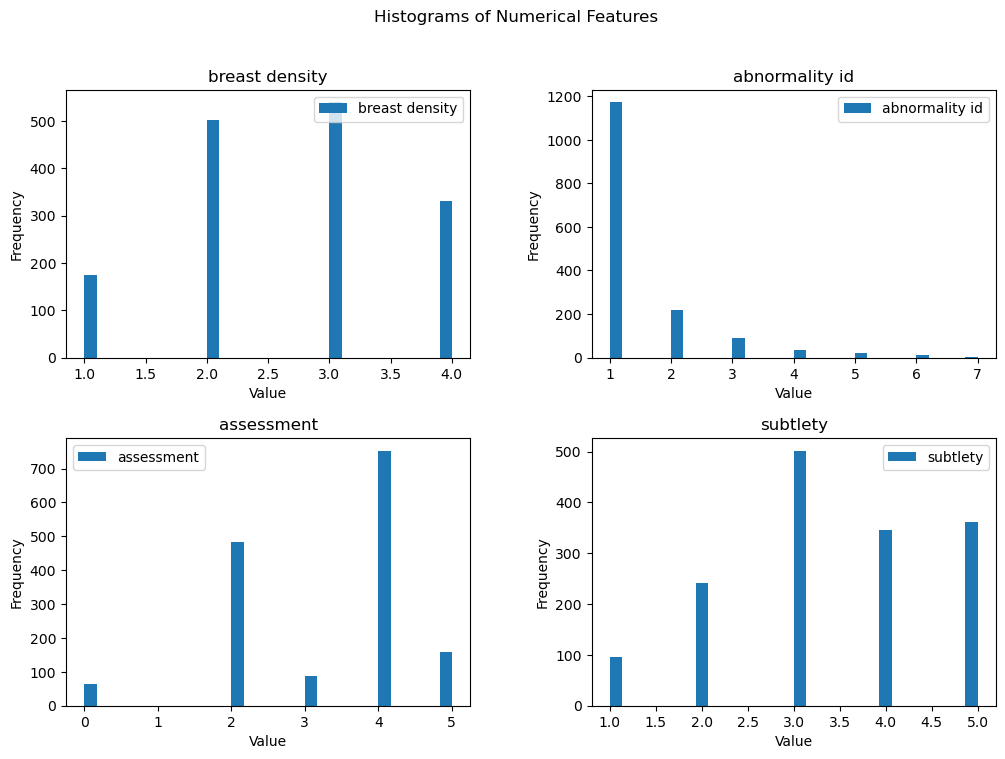

In [31]:
# Plot histogram for all numerical features

import matplotlib.pyplot as plt

# Plot histogram for numerical features
axes = df.hist(figsize=(12, 8), bins=30, grid=False)

# Add title
plt.suptitle("Histograms of Numerical Features")

# Check if `axes` is an array (multiple plots) or a single `Axes` object
if isinstance(axes, np.ndarray):
    for ax in axes.flatten():  # Now it works only if axes is an array
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")
        ax.legend([ax.get_title()])
else:
    axes.set_xlabel("Value")
    axes.set_ylabel("Frequency")
    axes.legend([axes.get_title()])

# Show the plot
plt.show()

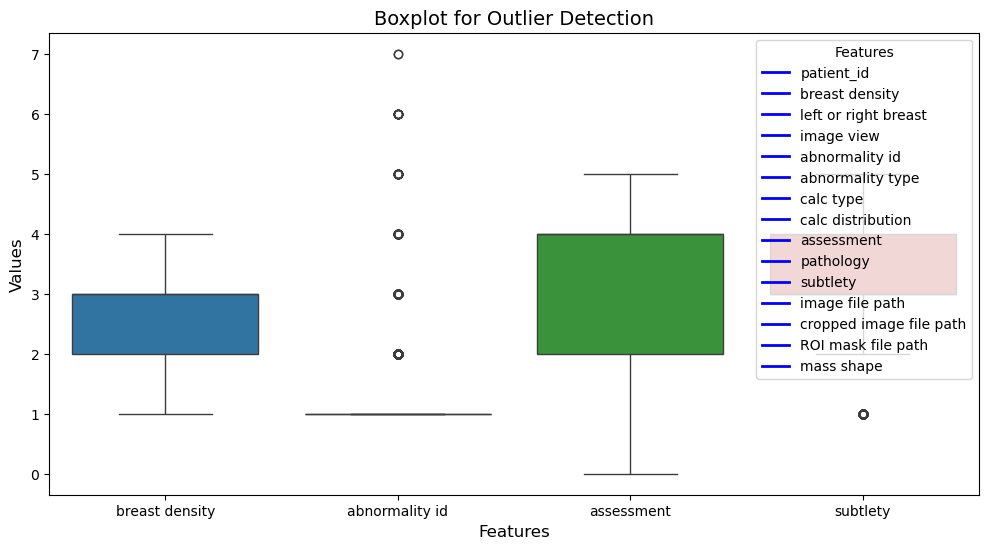

In [32]:
#Plot Boxplot to detect any outliers in numeric features 

import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(12, 6))  # Adjust figure size
ax = sns.boxplot(data=df)

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Generate legend dynamically based on column names
handles = [plt.Line2D([0], [0], color="blue", lw=2, label=col) for col in df.columns]
plt.legend(handles=handles, title="Features", loc="upper right")

# Show the plot
plt.show()

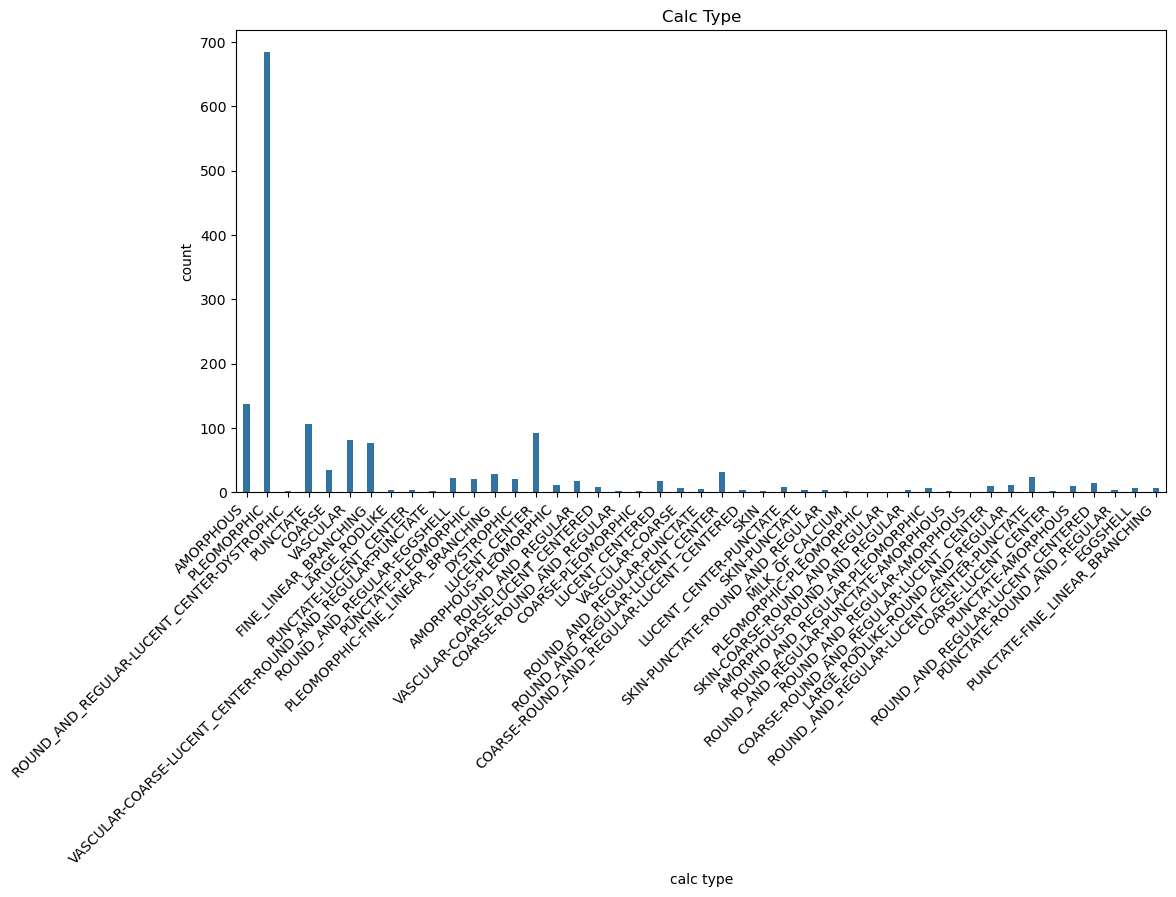

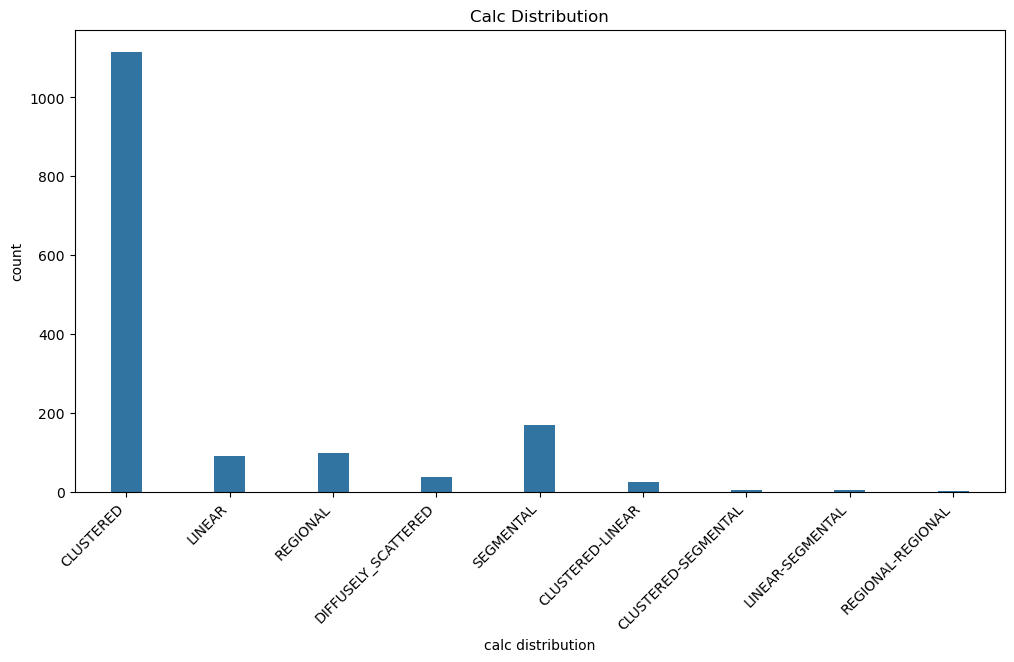

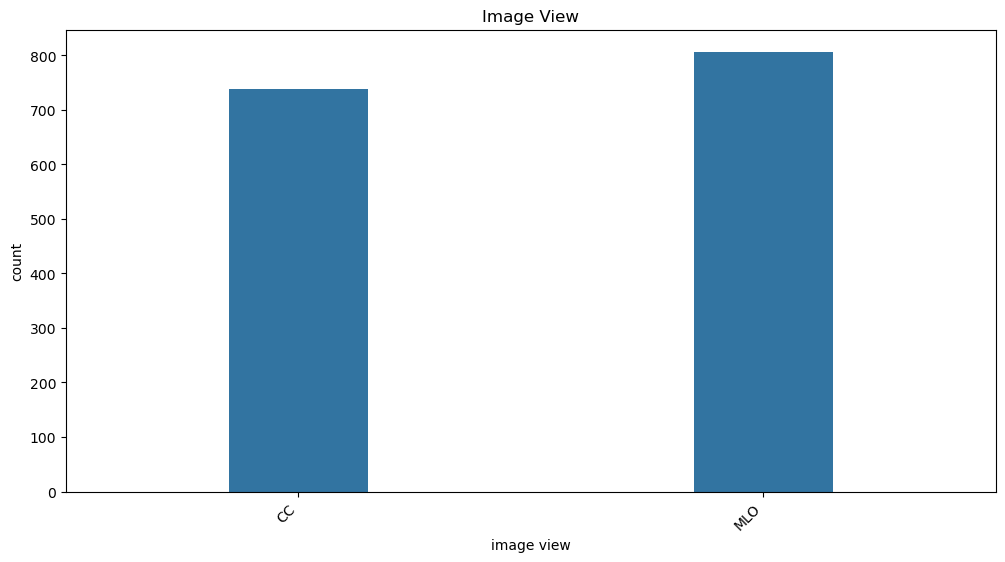

In [33]:
#Plot count plots for categorical variables to count occurences of unique category in a column 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='calc type', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Calc Type")
plt.show()

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='calc distribution', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Calc Distribution")
plt.show()

plt.figure(figsize=(12,6))  # Increase figure size
sns.countplot(data=df, x='image view', width=0.3)  # Reduce bar width for better spacing
plt.xticks(rotation=45, ha='right')  # Rotate labels for clarity
plt.title("Image View")
plt.show()

pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64
pathology
MALIGNANT                  35.187581
BENIGN                     34.152652
BENIGN_WITHOUT_CALLBACK    30.659767
Name: proportion, dtype: float64


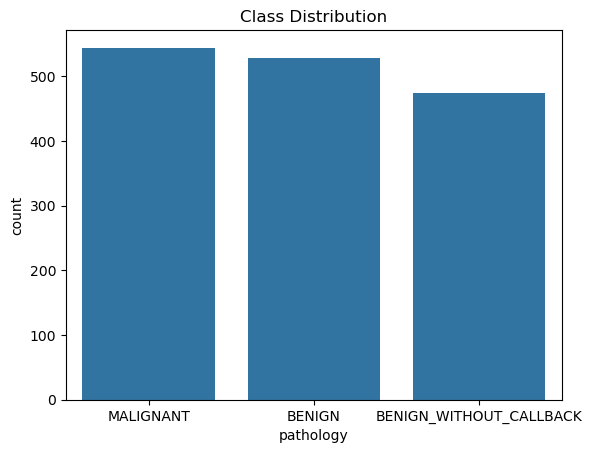

In [34]:
# Checking for imbalanced data for target class "pathology"
print(df["pathology"].value_counts())  # Counts occurrences of each class
print(df["pathology"].value_counts(normalize=True) * 100)  # Show percentage distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["pathology"])
plt.title("Class Distribution")
plt.show()

In [35]:
# Spearman coorelation matrix to detect correlation amongst numeric features 
import pandas as pd
import numpy as np

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute Spearman correlation matrix
spearman_corr = numeric_df.corr(method="spearman")

# Display correlation values
print("Spearman Correlation Matrix:\n")
print(spearman_corr)

Spearman Correlation Matrix:

                breast density  abnormality id  assessment  subtlety
breast density        1.000000       -0.142527    0.169981 -0.207115
abnormality id       -0.142527        1.000000   -0.317124  0.249500
assessment            0.169981       -0.317124    1.000000 -0.120830
subtlety             -0.207115        0.249500   -0.120830  1.000000


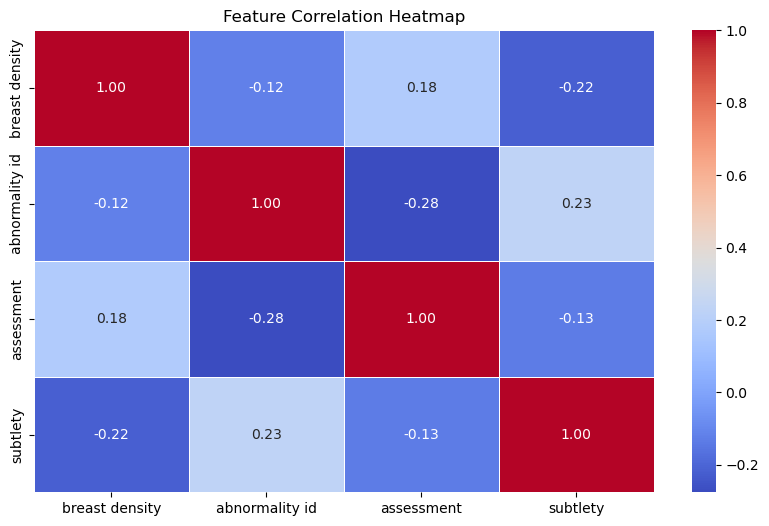

In [36]:
# Numeric feature coorelation display using heatmap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the column causing conversion issues
df = df.drop(columns=["patient_id"], errors="ignore")  # `errors="ignore"` prevents errors if the column doesn't exist

# Compute correlation matrix (only for numeric columns)
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

In [37]:
#EDA Analysis and Findings: 

#The dataset consists of 1,546 rows and 14 columns. It includes a mix of 8 categorical (object) and 6 numerical columns (int64)

#The calc type and calc distribution columns contain both strings and floats, are treated as categorical variables in the dataset
#to ensure consistency they are converted to string in this notebook

#abnormality id and assesment are treated as an integer but are categorical. So,convert them into a category like a text or string during pre-processing
 
#Histogram:
#Breast Density: Looking at histogram, it is clear that it is a categorical data. There are 4 categories, with most representation in categories 2 and 3
#abnormality id: It is also a category. Lower numbers are more common than the higher numbers. So, more common conditions are in category 1 
#assesment: Most of the values are in category 4. There is no assesment in category 1
#subtlety: It is of uncertain distribution becuse it is not really a fully normal curve

#Box Plot:
#abnormality id: Even though the plot highlights outliers in this variable, they are not true outliers as abnormality id is a category and
#, not a continous variable. Most of the data points are in 1, so only a few are outside it 
#subtlety: Most of the values are between 3-4 with a few values above 4 and a few below 3 

#Imbalance data check for target variable:
#target class is not terribly imbalanced even if you combine "begnin" and "begnin with callback" as it is only 50% more than the malignant class

#Correlation analysis using Heatmap
#abnormality id and subtlety are weakly positively correlated as R2 (coefficient of determination) value is much less than 1
#Heatmap again displays this weak correlation between abnormality id and subtlety. Since they are categorical, correlation doesn’t really matter